In [12]:
# Section 1: Import Libraries
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical plots
from google.colab import files  # Manual file uploads
from datetime import datetime  # Handling date and time

In [15]:
# Section 2: Data Upload and Loading
# Upload Fraud Data and IP Address Data
print("Upload 'Fraud_Data.csv' and 'IpAddress_to_Country.csv':")
uploaded_files = files.upload()

Upload 'Fraud_Data.csv' and 'IpAddress_to_Country.csv':


Saving Fraud_Data.csv to Fraud_Data (1).csv
Saving IpAddress_to_Country.csv to IpAddress_to_Country (1).csv


In [16]:
# Load data into pandas DataFrames
fraud_data = pd.read_csv('Fraud_Data.csv')
ip_data = pd.read_csv('IpAddress_to_Country.csv')

In [20]:
# Display the first few rows of both datasets
print("\nSample Fraud Data:")
print(fraud_data.head())
print("\nSample IP Data:")
print(ip_data.head())


Sample Fraud Data:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

Sample IP Data:
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.

In [41]:
# Section 3: Handle Missing Values
# Check for missing values in both datasets
print("\nMissing Values in Fraud Data:")
print(fraud_data.isnull().sum())

print("\nMissing Values in IP Data:")
print(ip_data.isnull().sum())


Missing Values in Fraud Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing Values in IP Data:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [42]:
# Fill missing values in fraud data with median for numerical columns
fraud_data_filled = fraud_data.fillna(fraud_data.median(numeric_only=True))

In [43]:
# Section 4: Data Cleaning
# Remove duplicates in fraud data
fraud_data_cleaned = fraud_data_filled.drop_duplicates()

In [44]:
# Correct Data Types
fraud_data_cleaned.columns = fraud_data_cleaned.columns.str.strip()

In [45]:
# Convert 'purchase_time' and 'signup_time' to datetime
fraud_data_cleaned['purchase_time'] = pd.to_datetime(fraud_data_cleaned['purchase_time'], errors='coerce')
fraud_data_cleaned['signup_time'] = pd.to_datetime(fraud_data_cleaned['signup_time'], errors='coerce')

In [46]:
# Section 5: Exploratory Data Analysis (EDA)
# Check columns in Fraud Data
print("\nColumns in Fraud Data:")
print(fraud_data_cleaned.columns)


Columns in Fraud Data:
Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


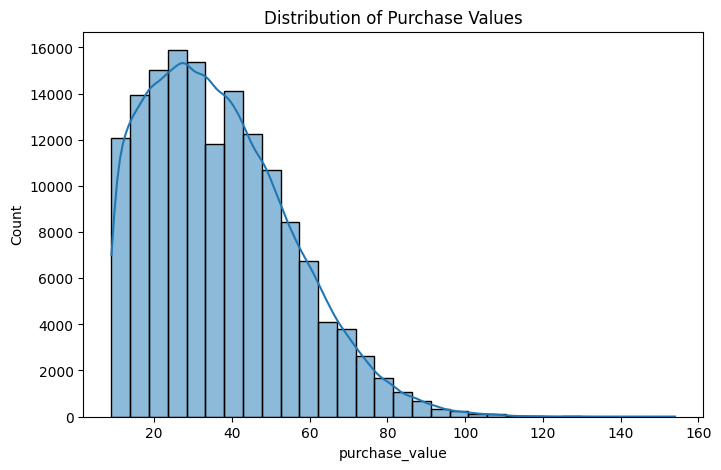

In [47]:
# Visualize purchase values (purchase_value)
plt.figure(figsize=(8, 5))
sns.histplot(fraud_data_cleaned['purchase_value'], bins=30, kde=True)
plt.title('Distribution of Purchase Values')
plt.show()

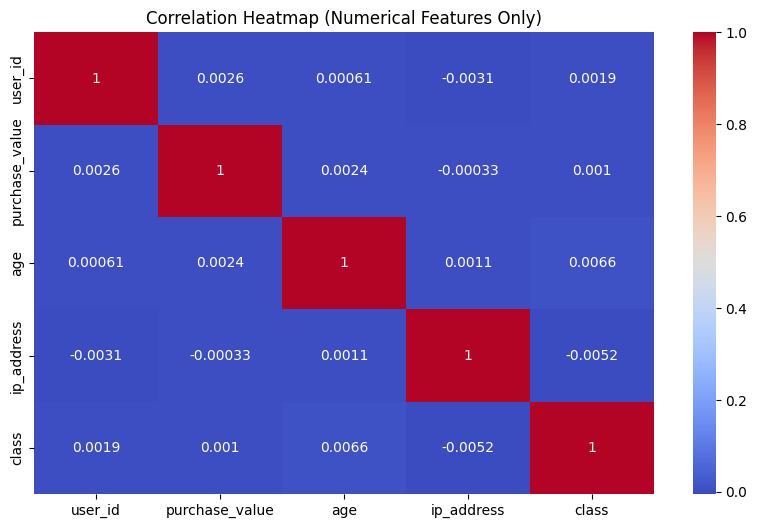

In [49]:
# Section: Correlation Heatmap (Only for Numerical Features)
# Select only numeric columns for correlation
numeric_cols = fraud_data_cleaned.select_dtypes(include=[np.number])

# Check if there are any numerical columns available
if not numeric_cols.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap (Numerical Features Only)')
    plt.show()
else:
    print("No numerical columns available for correlation.")

In [61]:
# Section 6: Geolocation Analysis (Merging Datasets)
# Convert IP addresses in fraud data to numeric (assuming IPv4)
fraud_data_cleaned['ip_numeric'] = fraud_data_cleaned['ip_address'].astype(float)

# Assuming the relevant column in ip_data for IP address range is 'lower_bound_ip_address'
merged_data = fraud_data_cleaned.merge(ip_data, how='left', left_on='ip_numeric', right_on='lower_bound_ip_address')


In [62]:
# Section 7: Feature Engineering
# Transaction frequency (number of transactions per user)
transaction_freq = merged_data.groupby('user_id').size().reset_index(name='TransactionCount')

In [63]:
# Velocity: Amount spent per hour
merged_data['hour'] = merged_data['purchase_time'].dt.hour
velocity = merged_data.groupby(['user_id', 'hour'])['purchase_value'].sum().reset_index(name='Velocity')

In [64]:
# Time-based features: hour_of_day and day_of_week
merged_data['day_of_week'] = merged_data['purchase_time'].dt.day_name()
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour

In [67]:
# Section 8: Normalization and Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_data['NormalizedAmount'] = scaler.fit_transform(merged_data[['purchase_value']])

In [68]:
# Section 9: Encode Categorical Features
# One-hot encoding for categorical features (e.g., 'day_of_week')
merged_data_encoded = pd.get_dummies(merged_data, columns=['day_of_week'], drop_first=True)

In [69]:
# Section 10: Save Cleaned and Processed Data (Optional)
# Save the processed data to a new CSV file
merged_data_encoded.to_csv('Processed_Fraud_Data.csv', index=False)

print("\nProcessing Complete. Cleaned data saved as 'Processed_Fraud_Data.csv'.")


Processing Complete. Cleaned data saved as 'Processed_Fraud_Data.csv'.


In [71]:
files.download('Processed_Fraud_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>